In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

# AM207 Homework 1
## Elie Attias

In [2]:
#os.getcwd()
file = "./cdf.csv"
df = pd.read_csv(file)
df.head()
x = df[["x"]].values
y = df[["cdf"]].values

Text(0, 0.5, 'frequency')

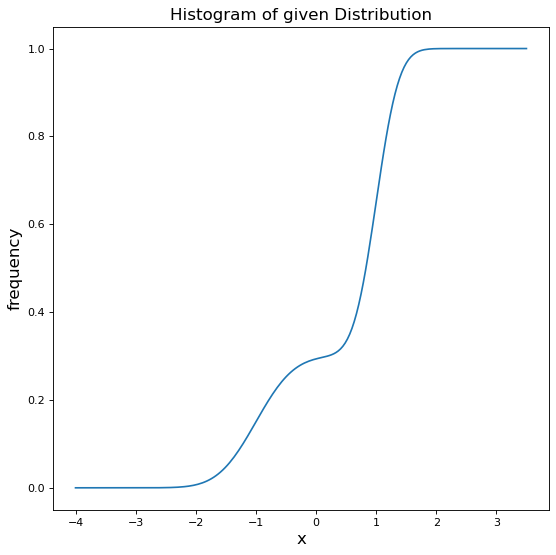

In [3]:
median = 0.5
for i in range(len(y)):
    if y[i]>0.5:
        break
the_median = x[i]
figure(figsize=(8, 8), dpi=80)
plt.plot(x, y)
plt.title('Histogram of given Distribution', fontsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)

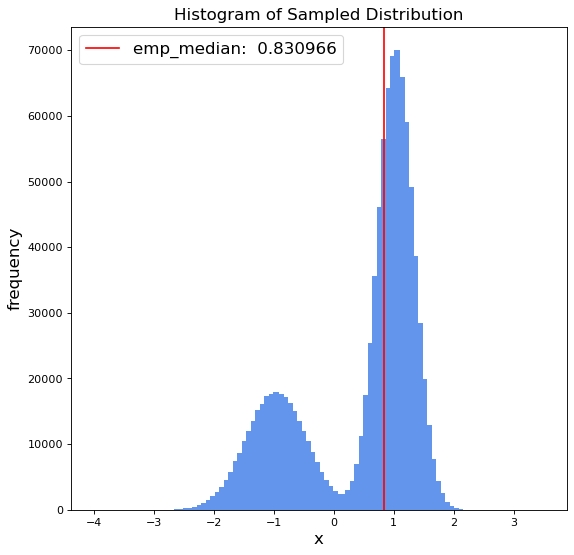

In [4]:
file = "./histogram_Elie.csv"
data = pd.read_csv(file)
data.head()
x = data["X"]
y = data["Y"]

figure(figsize=(8, 8), dpi=80)
plt.bar(x, y, width = 0.1, color = 'cornflowerblue')
emp_median =  0.830966
plt.axvline(x = emp_median, color = 'r', label = 'emp_median:  0.830966')
plt.title('Histogram of Sampled Distribution', fontsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)
plt.legend(loc = 'upper left', fontsize = 15)

In [5]:
def g(x, d):
    for i in x:
        if abs(i) > 1:
            return 0
    return F(x, d)

def F(x, d):
    return sum([x_i**2 for x_i in x])/(2**(d))

np.random.seed(1)

In [6]:
def Rejection_Sampling(d, M):
    start = time.time()
    total_sum1 = 0
    total_sum2 = 0
    q = 0 
    m = 0
    crit = 0
    gamma = 1.5
    for i in range(int(M)):
        q = 0
        while crit ==0:
            x = np.random.uniform(low= -1., high=1.0, size = d)
            y = np.random.uniform(low= 0., high=1.0)
            if y < gamma*(0.1 + F(x, d)):
                q = 0.1 + F(x, d)
                w = 1/q
                total_sum1 += w * g(x, d)
                total_sum2 += w
                break
    
    estimate = pow(2, d) * total_sum1 / total_sum2
    end = time.time()
    return estimate, end - start

Text(0.5, 1.0, 'Running time of Rejection Sampling Algorithm \n for  C++ and Python as a function of dimension')

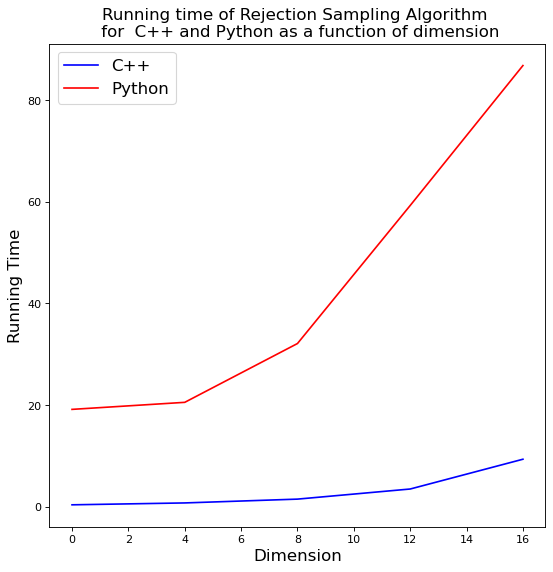

In [7]:
Dimensions = np.linspace(0, 16, 5)
Iter = np.linspace(1, 1e6, 7)
M = 1000000

## varying dimension
python_dims = [Rejection_Sampling(a, M)[1] for a in [1,2,4,8,16]]
python_M = [Rejection_Sampling(16, M)[1] for M in [2, 10, 1e2, 1e3, 1e4, 1e5, 1e6]]

#evaluated by hand from terminal : screenshots of command line present in the latex
cpp_dim = [0.38, 0.75, 1.5, 3.49, 9.35]
cpp_iter = [0,0,0, 0.01,0.09, 0.94, 9.31]


figure(figsize=(8, 8), dpi=80)
plt.plot(Dimensions, cpp_dim, c = 'b', label = 'C++')
plt.plot(Dimensions, python_dims, c = 'r', label = 'Python')
plt.legend(loc = "upper left", fontsize=15)
plt.xlabel('Dimension', fontsize=15)
plt.ylabel('Running Time', fontsize=15)
plt.title('Running time of Rejection Sampling Algorithm \n for  C++ and Python as a function of dimension', fontsize=15)

In [8]:
### compute average relative speed factor difference
a = 0
c = 0
for i in range(7):
    if cpp_iter[i] != 0:
        c += 1
        a += (python_M[i]/cpp_iter[i])
print(f"Python is in average {a/c} times slower than c++ based on our observations")

Python is in average 9.23361199875685 times slower than c++ based on our observations


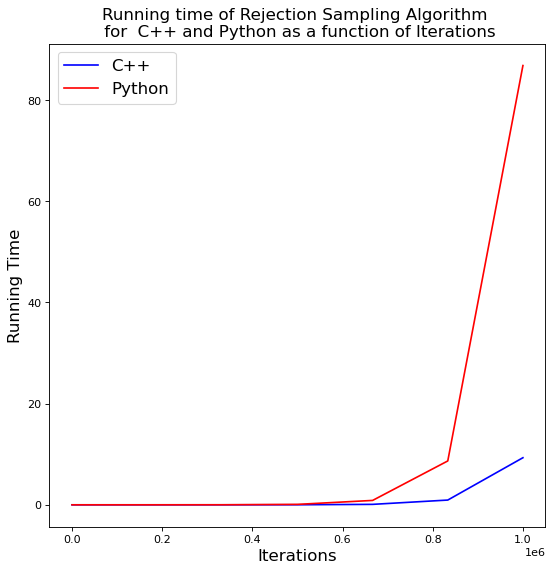

In [9]:
figure(figsize=(8, 8), dpi=80)
plt.plot(Iter, cpp_iter, c = 'b', label = 'C++')
plt.plot(Iter, python_M, c = 'r', label = 'Python')
plt.legend(loc = "upper left", fontsize=15)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Running Time', fontsize=15)
plt.title('Running time of Rejection Sampling Algorithm \n for  C++ and Python as a function of Iterations', fontsize=15)
plt.savefig('cpp_vs_python.png')
plt.show()

In [10]:
df3 = pd.read_csv("./MC_err_matrix.csv")
df4 = pd.read_csv("./IS_error_matrix.csv")
df5 = pd.read_csv("./RS_error_matrix.csv")
Iterations = np.array([1, 10, 100, 1000, 10000, 100000, 1000000])
sqrt_M = [np.sqrt(1/i) for i in Iterations]

Text(0.5, 1.0, 'Monte Carlo: error vs iteration for different dimensions in Log-Log scale')

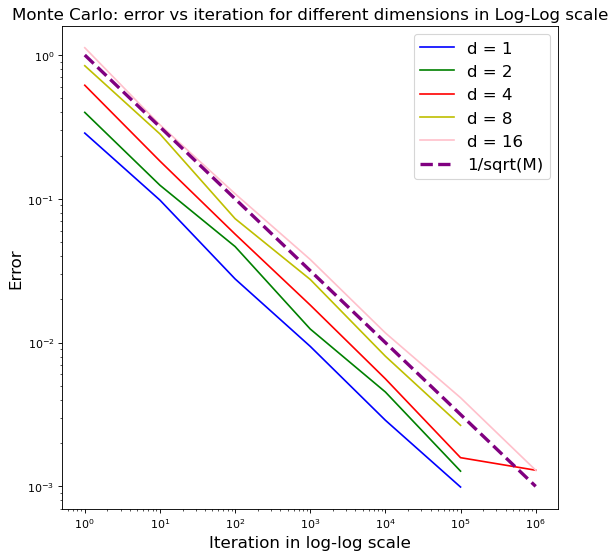

In [11]:
## Monte Carlo Plot
figure(figsize=(8, 8), dpi=80)
MC_d1 = df3['1'].values
MC_d2 = df3['2'].values
MC_d4 = df3['4'].values
MC_d8 = df3['8'].values
MC_d16 = df3['16'].values

plt.plot(Iterations[:-1], MC_d1[:-1], c = 'b', label = 'd = 1')
plt.plot(Iterations[:-1], MC_d2[:-1], c = 'g', label = 'd = 2')
plt.plot(Iterations, MC_d4, c = 'r', label = 'd = 4')
plt.plot(Iterations[:-1], MC_d8[:-1], c = 'y', label = 'd = 8')
plt.plot(Iterations, MC_d16, c = 'pink', label = 'd = 16')

plt.plot(Iterations, sqrt_M,  '--', c = 'purple', label = "1/sqrt(M)", linewidth=3.0)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Iteration in log-log scale", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.legend(loc = 'upper right', fontsize=15)
plt.title("Monte Carlo: error vs iteration for different dimensions in Log-Log scale", fontsize=15)

Text(0.5, 1.0, 'Importance Sampling: error vs iteration for different dimensions in Log-Log scale')

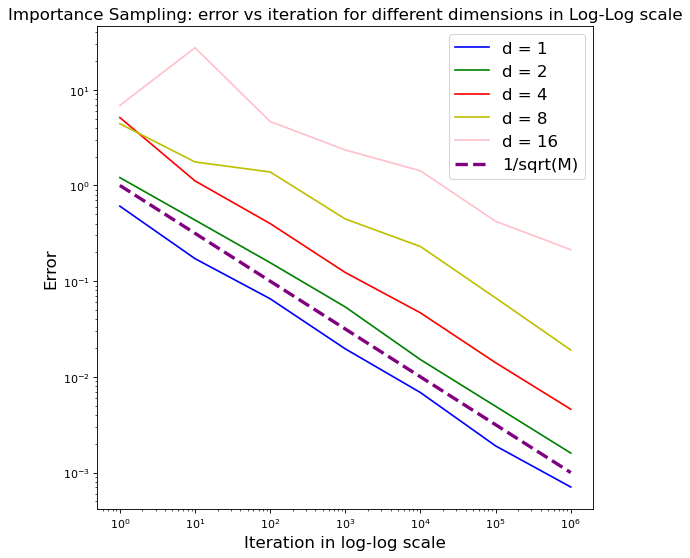

In [12]:
## Importance Sampling Plot
figure(figsize=(8, 8), dpi=80)

IS_d1 = df4['1'].values
IS_d2 = df4['2'].values
IS_d4 = df4['4'].values
IS_d8 = df4['8'].values
IS_d16 = df4['16'].values

plt.plot(Iterations, IS_d1, c = 'b', label = 'd = 1')
plt.plot(Iterations, IS_d2, c = 'g', label = 'd = 2')
plt.plot(Iterations, IS_d4, c = 'r', label = 'd = 4')
plt.plot(Iterations, IS_d8, c = 'y', label = 'd = 8')
plt.plot(Iterations, IS_d16, c = 'pink', label = 'd = 16')
plt.plot(Iterations, sqrt_M,  '--', c = 'purple', label = "1/sqrt(M)", linewidth=3.0)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iteration in log-log scale", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.legend(loc = 'upper right', fontsize=15)
plt.title("Importance Sampling: error vs iteration for different dimensions in Log-Log scale", fontsize=15)

Text(0.5, 1.0, 'Rejection Sampling: error vs iteration for different dimensions in Log-Log scale')

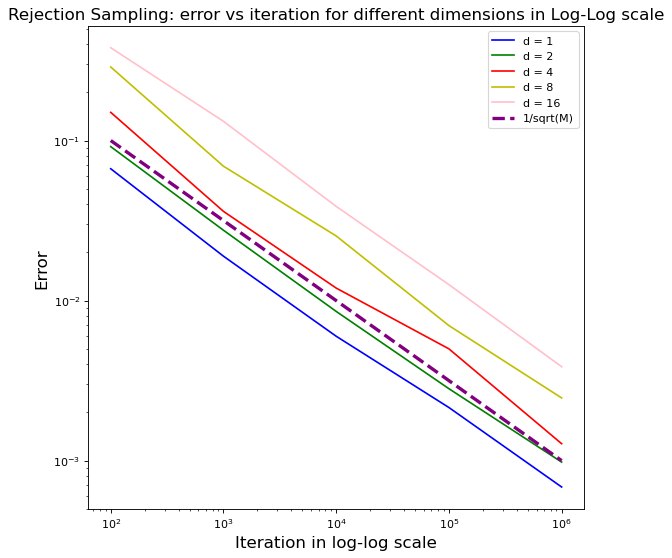

In [13]:
## Rejection Sampling Plot
figure(figsize=(8, 8), dpi=80)
RJ_d1 = df5['1'].values
RJ_d2 = df5['2'].values
RJ_d4 = df5['4'].values
RJ_d8 = df5['8'].values
RJ_d16 = df5['16'].values

plt.plot(Iterations, RJ_d1, c = 'b', label = 'd = 1')
plt.plot(Iterations, RJ_d2, c = 'g', label = 'd = 2')
plt.plot(Iterations, RJ_d4, c = 'r', label = 'd = 4')
plt.plot(Iterations, RJ_d8, c = 'y', label = 'd = 8')
plt.plot(Iterations, RJ_d16, c = 'pink', label = 'd = 16')
plt.plot(Iterations[2:], sqrt_M[2:],  '--', c = 'purple', label = "1/sqrt(M)", linewidth=3.0)
plt.legend(loc = 'upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iteration in log-log scale", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.title("Rejection Sampling: error vs iteration for different dimensions in Log-Log scale", fontsize=15)